# Quantum Mechanics: Bound State Energy Levels and Wave Functions

To get a taste of what you will be doing in your future career, consider an electron in a quantum well.

An electron is in a square well of height $V_0 = 20 $, $\text{eV} $ and width $a = 2a_0$, where $a_0 = 0.529 \times 10^{-10}\text{m})$ is the Bohr radius. The energy of the electron $E < V_0$.


Analysis:
$$E \psi = \hat{H} \psi $$

$$E \psi = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} + V(x) \psi$$

$$
\frac{\hbar^2}{2m} \frac{1}{\psi} \frac{\partial^2 \psi}{\partial x^2} = V(x) - E 
$$

$$
 \frac{\partial^2 \psi}{\partial x^2} = -\frac{2m}{\hbar^2} \psi (E - V(x)) 
$$


To solve the problem of determining the allowed energy levels for a particle in a finite square well, we proceed as follows:

### Definitions and Formulation:

1. **Wave Vector** $k $ and **Decay Constant** $kappa $:
   - Inside the well (where $E < V_0 $), the wave function is oscillatory, and the wave vector $k $ is given by:

   $$
   k = \frac{\sqrt{2 m E}}{\hbar}
   $$

   where $m $ is the mass of the particle and $E $ is the energy of the particle.

   - Outside the well (where $E < V_0 $), the wave function decays exponentially, and the decay constant $\kappa $ is given by:

   $$
   \kappa = \frac{\sqrt{2 m (V_0 - E)}}{\hbar}
   $$

   where $V_0 $ is the potential depth (height of the well), and $E $ is the energy of the particle.

2. **Transcendental Equation for Energy Levels**:
   To find the allowed energy levels $E $, we solve the following transcendental equation, which comes from the boundary conditions of the wave function at the edges of the well:

   $$
   \tan \left(\frac{k a}{2}\right) = \frac{k}{\kappa}
   $$

   where:
   - $a $ is the width of the well,
   - $k $ and $kappa $ are defined as above.

   The solution to this equation gives the discrete energy levels $E $ for the bound states of the particle.

3. **Wave Function Calculation**:
   Once the allowed energies are found, we use them to compute the wave functions. The wave function $psi(x) $ inside the well (for $|x| < a $) can be expressed as:

   $$
   \psi(x) = \begin{cases} 
   A \cos(kx) & \text{for even solutions} \\
   A \sin(kx) & \text{for odd solutions}
   \end{cases}
   $$

   where $A $ is a normalization constant. Outside the well (for $|x| > a $), the wave function decays exponentially as:

   $$
   \psi(x) \propto e^{-\kappa |x|} 
   $$

4. **Procedure**:
   - **Step 1**: Solve the transcendental equation for $E $, which involves finding the roots of the equation for given values of $V_0 $ and $a $.
   - **Step 2**: For each energy $E $, calculate the corresponding wave vector $k $ inside the well and decay constant $\kappa$ outside the well.
   - **Step 3**: Use the calculated energy levels to plot the wave function for both even and odd solutions, ensuring that the wave functions are properly normalized and satisfy the boundary conditions at $x = \pm a $.

5. **Energy Levels**:
   The energy levels are discrete and depend on the width of the well and the potential depth. As $a $ increases or $V_0 $ increases, the energy levels will become more spaced out.

6. **Graphical Representation**:
   - The wave functions corresponding to each energy level can be plotted for both the even and odd solutions, with the boundary of the well marked at $x = \pm a $. The wave functions will oscillate inside the well and decay exponentially outside the well.

### Summary:

- **Key Equation**: The transcendental equation $tan \left(\frac{k a}{2}\right) = \frac{k}{\kappa} $ is solved to find the allowed energy levels for bound states.
- **Wave Function**: After finding the energy levels, the corresponding wave functions are computed and plotted.


In [4]:
# Import necessary libraries
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Constants
m = 9.109e-31  # Electron mass (kg)
hbar = 1.055e-34  # Reduced Planck's constant (Js)
a0 = 0.529e-10  # Bohr radius (m)
eV_to_J = 1.602e-19  # Conversion factor from eV to J
joule_to_eV = (1.60218e-19)**-1

In [5]:
# Dimensionless equations
def transcendental_even_dimless(z, z0):
    if z <= 0 or z >= z0:  # Invalid range for z
        return np.inf
    return np.tan(z) - np.sqrt((z0 / z)**2 - 1)

def transcendental_odd_dimless(z, z0):
    if z <= 0 or z >= z0:  # Invalid range for z
        return np.inf
    return -1 / np.tan(z) - np.sqrt((z0 / z)**2 - 1)


In [6]:
# Find dimensionless roots
def find_dimensionless_roots(z0):
    z_range = np.linspace(1e-5, z0 - 1e-5, 100)  # Avoid 0 and z0
    even_roots = []
    odd_roots = []

    for z_guess in z_range:
        try:
            even_root = root_scalar(transcendental_even_dimless, args=(z0,), bracket=(z_guess, z0), method='brentq').root
            odd_root = root_scalar(transcendental_odd_dimless, args=(z0,), bracket=(z_guess, z0), method='brentq').root
            if even_root not in even_roots:
                even_roots.append(even_root)
            if odd_root not in odd_roots:
                odd_roots.append(odd_root)
        except:
            continue
    return np.unique(even_roots), np.unique(odd_roots)

# Convert z to energy
def z_to_energy(z, a):
    return (z**2 * hbar**2) / (2 * m * a**2)


In [7]:
def wavefunction(x, z, a, parity="even"):
    k = z / a  # Convert z to k
    psi = np.zeros_like(x)
    if parity == "even":
        psi = np.where(np.abs(x) <= a, np.cos(k * x), 0)
    else:
        psi = np.where(np.abs(x) <= a, np.sin(k * x), 0)
    return psi

In [8]:
def find_energy_levels_dimless(V0_eV, a_m):
    V0 = V0_eV * eV_to_J  # Convert V0 from eV to Joules
    z0 = a_m * np.sqrt(2 * m * V0) / hbar  # Calculate dimensionless z0
    even_z, odd_z = find_dimensionless_roots(z0)  # Solve for z values
    even_energies = [z_to_energy(z, a_m) for z in even_z]  # Convert z to energies
    odd_energies = [z_to_energy(z, a_m) for z in odd_z]
    return even_energies, odd_energies

In [9]:
import matplotlib.pyplot as plt
from IPython.display import display, Math

def plot_wavefunctions(a, V0_eV, even_energies, odd_energies):
    # Remove duplicate energies
    unique_even_energies = sorted(set(even_energies))
    unique_odd_energies = sorted(set(odd_energies))

    x = np.linspace(-2 * a, 2 * a, 1000)  # Define spatial range for plotting

    plt.figure(figsize=(10, 6))

    # Plot wavefunctions for even solutions
    for E in unique_even_energies:
        z = np.sqrt(2 * m * E) * a / hbar  # Convert energy to z
        psi = wavefunction(x, z, a, "even")  # Calculate wavefunction
        plt.plot(x, psi)  # No label here

    # Plot wavefunctions for odd solutions
    for E in unique_odd_energies:
        z = np.sqrt(2 * m * E) * a / hbar  # Convert energy to z
        psi = wavefunction(x, z, a, "odd")  # Calculate wavefunction
        plt.plot(x, psi)  # No label here

    # Add well boundaries and graph decorations
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")  # x-axis
    plt.axvline(-a, color="red", linestyle="--", label="Well Boundary")  # Left boundary
    plt.axvline(a, color="red", linestyle="--")  # Right boundary
    plt.title(f"Wavefunctions for V0 = {V0_eV} eV, a = {a/a0:.1f} a0")
    plt.xlabel("x (m)")
    plt.ylabel("Wavefunction ψ(x)")
    plt.grid()
    plt.show()


In [10]:
def display_unique_energies(unique_even_energies, unique_odd_energies, eV_to_J):
    """Display unique even and odd energies using LaTeX formatting and remove duplicates."""
    
    # Round energies to 2 decimal places and remove duplicates
    rounded_even_energies = set([round(E / eV_to_J, 2) for E in unique_even_energies])
    rounded_odd_energies = set([round(E / eV_to_J, 2) for E in unique_odd_energies])

    # Create LaTeX strings for even and odd energies
    even_energy_str = "Even Energies: " + ", ".join([f"{E:.2f}" for E in sorted(rounded_even_energies)]) + " eV"
    odd_energy_str = "Odd Energies: " + ", ".join([f"{E:.2f}" for E in sorted(rounded_odd_energies)]) + " eV"
    
    # Display the energies using LaTeX formatting
    display(Math(rf"{even_energy_str}"))
    display(Math(rf"{odd_energy_str}"))

## Part (a)
Use any numerical technique of your choice to calculate the allowed energy levels of the bound electron within the well, and plot the corresponding wave function(s) for each allowed energy level.

Setup:
- Square well height: $V_0 = 20 \text{eV} $
- Square well width: $a = 2a_0$
- Bohr radius: $a_0 = 0.529 \times 10^{-10} \ \text{m}$


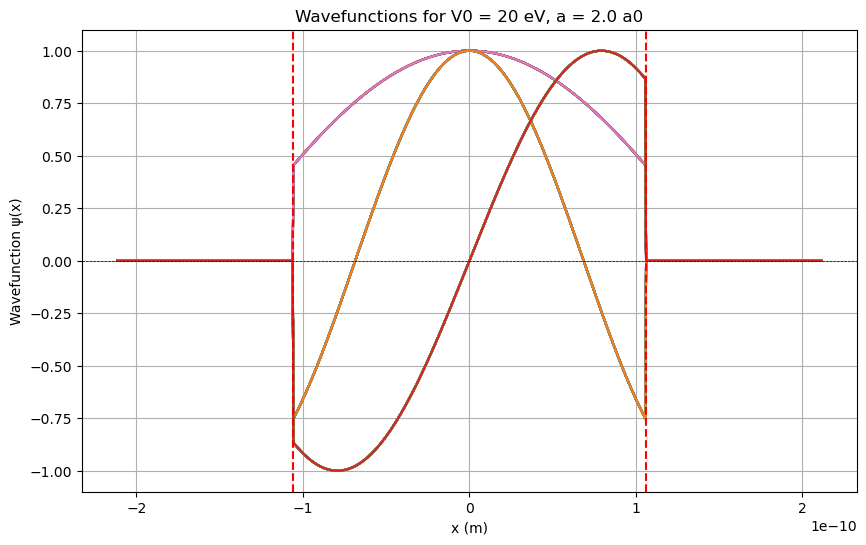

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
a_a0 = 2 * a0
V0_eV_a = 20

even_energies_a, odd_energies_a = find_energy_levels_dimless(V0_eV_a, a_a0)
plot_wavefunctions(a_a0, V0_eV_a, even_energies_a, odd_energies_a)
display_unique_energies(even_energies_a, odd_energies_a, eV_to_J)

## Part (b)
If the well width is increased to $6a_0$ and the well height to $V_0 = 40  \text{eV}$:

- Calculate the allowed energy levels of the bound electron.
- Plot all the corresponding wave function(s) for each allowed energy level.

Modified setup:
- Square well height: $V_0 = 40 \ \text{eV}$
- Square well width: $a = 6a_0$


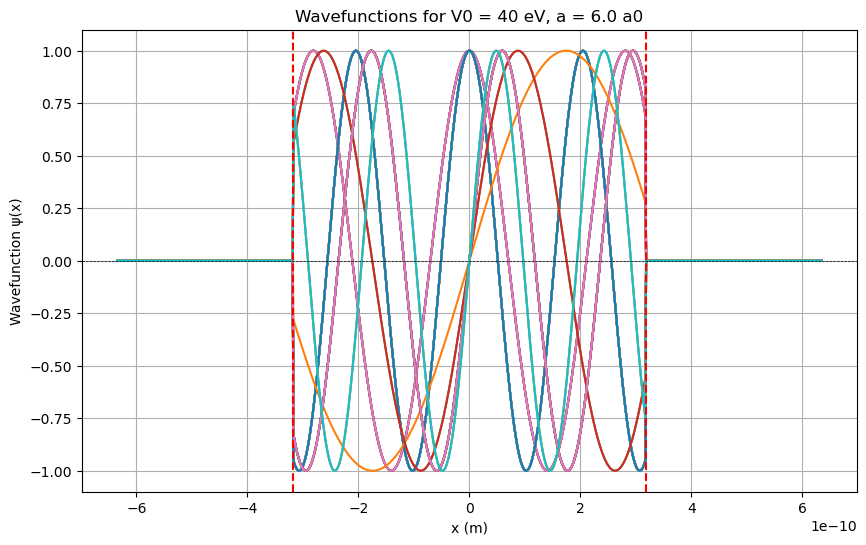

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
a_b0 = 6 * a0
V0_eV_b = 40

even_energies_b, odd_energies_b = find_energy_levels_dimless(V0_eV_b, a_b0)
plot_wavefunctions(a_b0, V0_eV_b, even_energies_b, odd_energies_b)
display_unique_energies(even_energies_b, odd_energies_b, eV_to_J)